In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pendulum as p

In [2]:
inj_df= pd.read_csv('injection_data.csv')

In [3]:
inj_df.dtypes

Time                          object
Drill Centre                  object
Well_Name                     object
BHP.kPag                     float64
BHT.degC                     float64
CO2 Injection Rate (kg/s)    float64
Cumm Inj (Tonnes)            float64
dtype: object

In [4]:
inj_df

,Time,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes)
0,2017-01-01 00:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
1,2017-01-01 01:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
2,2017-01-01 02:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
3,2017-01-01 03:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
4,2017-01-01 04:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
...,...,...,...,...,...,...,...
121567,2018-07-17 19:00:00,C,W7,22126.82543,82.695480,11.144886,316067.1780
121568,2018-07-17 19:00:00,C,W8,22137.77480,81.950245,11.133177,268214.0177
121569,2018-07-17 19:00:00,C,W9,0.00000,0.000000,11.518527,311460.8912
121570,2018-07-17 19:00:00,A,W1,22652.26241,90.776559,0.000000,356529.1229


In [5]:
inj_df.shape

(121572, 7)

In [6]:
inj_ndf = inj_df.drop(inj_df[(inj_df['CO2 Injection Rate (kg/s)'] == 0.0) & (inj_df['BHP.kPag'] == 0.0) & (inj_df['BHT.degC'] == 0.0) & (inj_df['Cumm Inj (Tonnes)'] == 0.0) ].index)

In [7]:
inj_ndf

,Time,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes)
0,2017-01-01 00:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
1,2017-01-01 01:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
2,2017-01-01 02:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
3,2017-01-01 03:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
4,2017-01-01 04:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
...,...,...,...,...,...,...,...
121567,2018-07-17 19:00:00,C,W7,22126.82543,82.695480,11.144886,316067.1780
121568,2018-07-17 19:00:00,C,W8,22137.77480,81.950245,11.133177,268214.0177
121569,2018-07-17 19:00:00,C,W9,0.00000,0.000000,11.518527,311460.8912
121570,2018-07-17 19:00:00,A,W1,22652.26241,90.776559,0.000000,356529.1229


In [8]:
inj_ndf.dropna()

,Time,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes)
0,2017-01-01 00:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
1,2017-01-01 01:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
2,2017-01-01 02:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
3,2017-01-01 03:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
4,2017-01-01 04:00:00,A,W1,0.00000,214.000000,0.000000,0.0000
...,...,...,...,...,...,...,...
121567,2018-07-17 19:00:00,C,W7,22126.82543,82.695480,11.144886,316067.1780
121568,2018-07-17 19:00:00,C,W8,22137.77480,81.950245,11.133177,268214.0177
121569,2018-07-17 19:00:00,C,W9,0.00000,0.000000,11.518527,311460.8912
121570,2018-07-17 19:00:00,A,W1,22652.26241,90.776559,0.000000,356529.1229


<AxesSubplot:xlabel='Drill Centre', ylabel='BHP.kPag'>

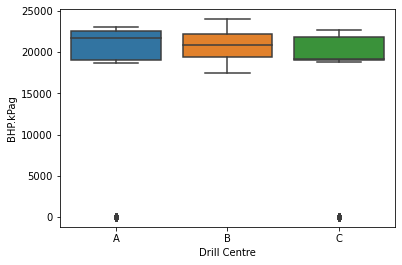

In [9]:
sns.boxplot(x=inj_ndf['Drill Centre'],y=inj_ndf['BHP.kPag'])

In [10]:
inj_ndf.drop(inj_ndf.loc[inj_ndf['BHP.kPag']==0].index, inplace=True)

In [11]:
inj_ndf

,Time,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes)
1057,2017-02-14 01:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1058,2017-02-14 02:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1059,2017-02-14 03:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1060,2017-02-14 04:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1061,2017-02-14 05:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
...,...,...,...,...,...,...,...
121566,2018-07-17 19:00:00,B,W6,21695.17271,94.756714,0.000000,191715.1524
121567,2018-07-17 19:00:00,C,W7,22126.82543,82.695480,11.144886,316067.1780
121568,2018-07-17 19:00:00,C,W8,22137.77480,81.950245,11.133177,268214.0177
121570,2018-07-17 19:00:00,A,W1,22652.26241,90.776559,0.000000,356529.1229


In [12]:
inj_ndf.drop(inj_ndf.loc[inj_ndf['BHT.degC']==0].index, inplace=True)

In [13]:
inj_ndf

,Time,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes)
1057,2017-02-14 01:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1058,2017-02-14 02:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1059,2017-02-14 03:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1060,2017-02-14 04:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1061,2017-02-14 05:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
...,...,...,...,...,...,...,...
121566,2018-07-17 19:00:00,B,W6,21695.17271,94.756714,0.000000,191715.1524
121567,2018-07-17 19:00:00,C,W7,22126.82543,82.695480,11.144886,316067.1780
121568,2018-07-17 19:00:00,C,W8,22137.77480,81.950245,11.133177,268214.0177
121570,2018-07-17 19:00:00,A,W1,22652.26241,90.776559,0.000000,356529.1229


<AxesSubplot:xlabel='Drill Centre', ylabel='BHP.kPag'>

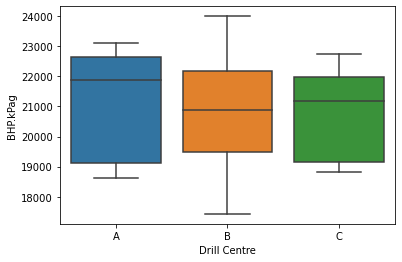

In [14]:
sns.boxplot(x=inj_ndf['Drill Centre'],y=inj_ndf['BHP.kPag'])

<AxesSubplot:xlabel='Well_Name', ylabel='BHP.kPag'>

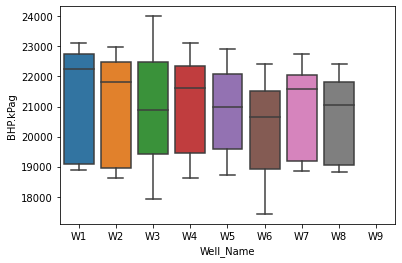

In [15]:
sns.boxplot(x=inj_ndf['Well_Name'],y=inj_ndf['BHP.kPag'])

<AxesSubplot:xlabel='Drill Centre', ylabel='BHT.degC'>

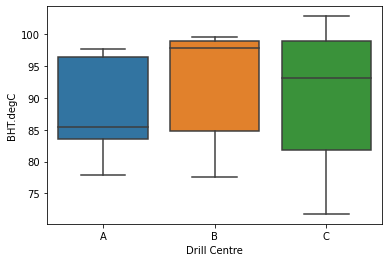

In [16]:
sns.boxplot(x=inj_ndf['Drill Centre'],y=inj_ndf['BHT.degC'])

<AxesSubplot:xlabel='Well_Name', ylabel='BHT.degC'>

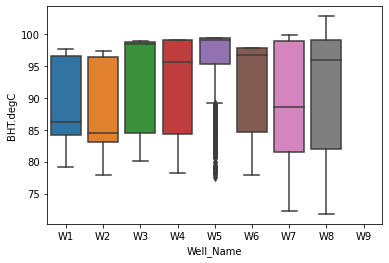

In [17]:
sns.boxplot(x=inj_ndf['Well_Name'],y=inj_ndf['BHT.degC'])

<AxesSubplot:xlabel='Drill Centre', ylabel='CO2 Injection Rate (kg/s)'>

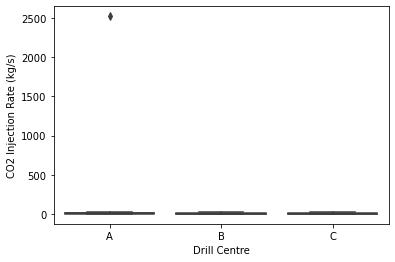

In [18]:
sns.boxplot(x=inj_ndf['Drill Centre'],y=inj_ndf['CO2 Injection Rate (kg/s)'])

<AxesSubplot:xlabel='Well_Name', ylabel='CO2 Injection Rate (kg/s)'>

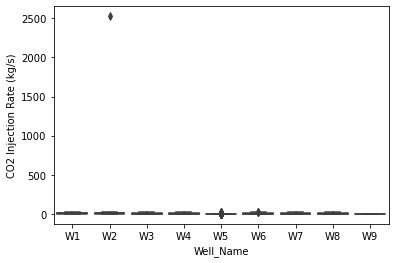

In [19]:
sns.boxplot(x=inj_ndf['Well_Name'],y=inj_ndf['CO2 Injection Rate (kg/s)'])

<AxesSubplot:>

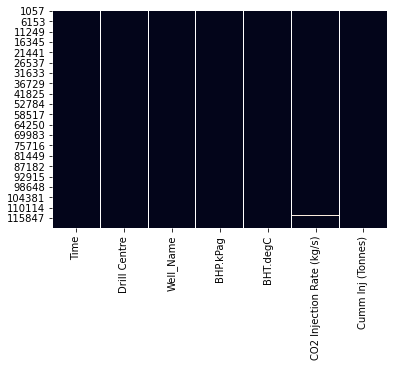

In [20]:
sns.heatmap(inj_ndf.isnull(),cbar=False)

<AxesSubplot:>

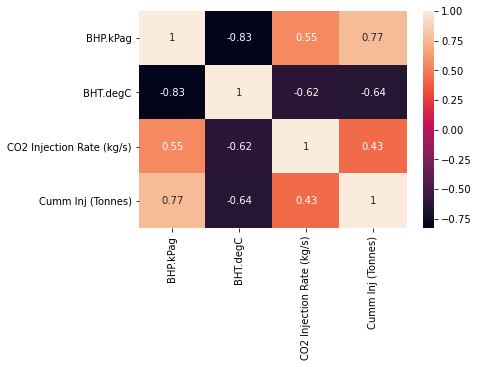

In [21]:
sns.heatmap(np.round(inj_ndf.corr(),2),annot=True)

In [22]:
w6_df = inj_ndf.loc[inj_ndf['Well_Name'] == 'W6']
w6_df

,Time,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes)
28025,2017-01-01 00:00:00,B,W6,18925.95117,97.889999,0.0,0.0000
28026,2017-01-01 01:00:00,B,W6,18925.95117,97.889999,0.0,0.0000
28027,2017-01-01 02:00:00,B,W6,18925.95117,97.887177,0.0,0.0000
28028,2017-01-01 03:00:00,B,W6,18925.95117,97.883677,0.0,0.0000
28029,2017-01-01 04:00:00,B,W6,18925.95117,97.889892,0.0,0.0000
...,...,...,...,...,...,...,...
121530,2018-07-17 15:00:00,B,W6,21695.51446,94.753032,0.0,191715.1524
121539,2018-07-17 16:00:00,B,W6,21696.53907,94.764441,0.0,191715.1524
121548,2018-07-17 17:00:00,B,W6,21696.85504,94.761400,0.0,191715.1524
121557,2018-07-17 18:00:00,B,W6,21696.88374,94.766403,0.0,191715.1524


<AxesSubplot:xlabel='Drill Centre', ylabel='BHT.degC'>

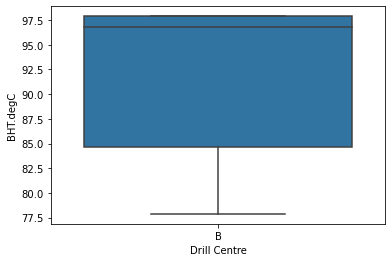

In [23]:
sns.boxplot(x=w6_df['Drill Centre'],y=w6_df['BHT.degC'])

<AxesSubplot:xlabel='Drill Centre', ylabel='CO2 Injection Rate (kg/s)'>

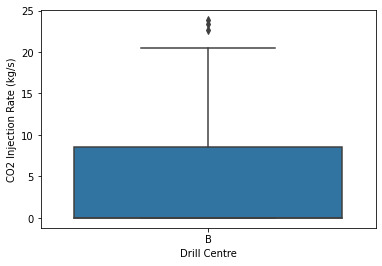

In [24]:
sns.boxplot(x=w6_df['Drill Centre'],y=w6_df['CO2 Injection Rate (kg/s)'])

<AxesSubplot:xlabel='Drill Centre', ylabel='CO2 Injection Rate (kg/s)'>

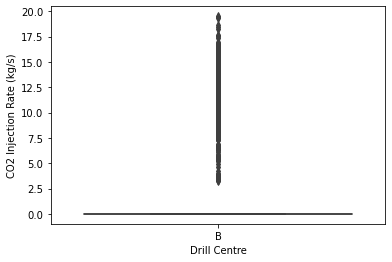

In [31]:
sns.boxplot(x=w5_df['Drill Centre'],y=w5_df['CO2 Injection Rate (kg/s)'])

In [25]:
inj_ndf

,Time,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes)
1057,2017-02-14 01:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1058,2017-02-14 02:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1059,2017-02-14 03:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1060,2017-02-14 04:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
1061,2017-02-14 05:00:00,A,W1,19105.21289,96.629997,0.000000,0.0000
...,...,...,...,...,...,...,...
121566,2018-07-17 19:00:00,B,W6,21695.17271,94.756714,0.000000,191715.1524
121567,2018-07-17 19:00:00,C,W7,22126.82543,82.695480,11.144886,316067.1780
121568,2018-07-17 19:00:00,C,W8,22137.77480,81.950245,11.133177,268214.0177
121570,2018-07-17 19:00:00,A,W1,22652.26241,90.776559,0.000000,356529.1229


In [27]:
evt_df = pd.read_csv('events_data.csv')

In [29]:
evt_df

,X,Y,Date/Time,Magnitude,Cluster
0,8009,104070,2017-09-05 01:27:55,-2.1,C-5
1,7728,104155,2017-09-25 16:38:05,-1.4,C-6
2,6712,104286,2017-10-02 09:48:26,-1.6,C-6
3,7649,104192,2017-10-07 13:32:06,-2.1,C-6
4,7683,104270,2017-10-08 05:23:34,-2.1,C-6
...,...,...,...,...,...
832,9244,103167,2018-07-12 11:42:46,-1.2,C-3
833,7782,105367,2018-07-13 01:06:40,-1.2,C-7
834,9760,103680,2018-07-13 11:19:25,-0.9,C-12
835,7400,104520,2018-07-13 21:38:37,-1.4,C-6


In [30]:
evt_df.isna().sum()

X            0
Y            0
Date/Time    0
Magnitude    0
Cluster      0
dtype: int64

In [32]:
inj_ndf.dtypes

Time                          object
Drill Centre                  object
Well_Name                     object
BHP.kPag                     float64
BHT.degC                     float64
CO2 Injection Rate (kg/s)    float64
Cumm Inj (Tonnes)            float64
dtype: object

In [33]:
evt_df['Date/Time'] = pd.to_datetime(evt_df['Date/Time'])

In [39]:
inj_ndf['Time'] = pd.to_datetime(inj_ndf['Time'])

In [35]:
evt_df['ext_date'] = [d.date() for d in evt_df['Date/Time']]
evt_df['ext_time'] = [d.time() for d in evt_df['Date/Time']]

In [40]:
inj_ndf['inj_date'] = [d.date() for d in inj_ndf['Time']]
inj_ndf['inj_time'] = [d.time() for d in inj_ndf['Time']]

In [37]:
evt_df.drop(['Date/Time'], axis = 1, inplace=True)

In [41]:
inj_ndf.drop(['Time'], axis = 1, inplace=True)

In [42]:
evt_df

,X,Y,Magnitude,Cluster,ext_date,ext_time
0,8009,104070,-2.1,C-5,2017-09-05,01:27:55
1,7728,104155,-1.4,C-6,2017-09-25,16:38:05
2,6712,104286,-1.6,C-6,2017-10-02,09:48:26
3,7649,104192,-2.1,C-6,2017-10-07,13:32:06
4,7683,104270,-2.1,C-6,2017-10-08,05:23:34
...,...,...,...,...,...,...
832,9244,103167,-1.2,C-3,2018-07-12,11:42:46
833,7782,105367,-1.2,C-7,2018-07-13,01:06:40
834,9760,103680,-0.9,C-12,2018-07-13,11:19:25
835,7400,104520,-1.4,C-6,2018-07-13,21:38:37


In [43]:
inj_ndf

,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes),inj_date,inj_time
1057,A,W1,19105.21289,96.629997,0.000000,0.0000,2017-02-14,01:00:00
1058,A,W1,19105.21289,96.629997,0.000000,0.0000,2017-02-14,02:00:00
1059,A,W1,19105.21289,96.629997,0.000000,0.0000,2017-02-14,03:00:00
1060,A,W1,19105.21289,96.629997,0.000000,0.0000,2017-02-14,04:00:00
1061,A,W1,19105.21289,96.629997,0.000000,0.0000,2017-02-14,05:00:00
...,...,...,...,...,...,...,...,...
121566,B,W6,21695.17271,94.756714,0.000000,191715.1524,2018-07-17,19:00:00
121567,C,W7,22126.82543,82.695480,11.144886,316067.1780,2018-07-17,19:00:00
121568,C,W8,22137.77480,81.950245,11.133177,268214.0177,2018-07-17,19:00:00
121570,A,W1,22652.26241,90.776559,0.000000,356529.1229,2018-07-17,19:00:00


In [44]:
mg_df = pd.read_csv('merged.csv')

In [45]:
mg_df

,Time,DrillCentre,Well_Name,BHP.kPag,BHT.degC,CO2InjectionRate(kg/s),CummInj(Tonnes),X,Y,Datetime,Magnitude,Cluster
0,01-01-2017 00:00,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN
1,01-01-2017 01:00,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN
2,01-01-2017 02:00,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN
3,01-01-2017 03:00,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN
4,01-01-2017 04:00,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
122431,17-07-2018 19:00,C,W7,22126.82543,82.695480,11.144886,316067.1780,NaN,NaN,NaN,NaN,NaN
122432,17-07-2018 19:00,C,W8,22137.77480,81.950245,11.133177,268214.0177,NaN,NaN,NaN,NaN,NaN
122433,17-07-2018 19:00,C,W9,0.00000,0.000000,11.518527,311460.8912,NaN,NaN,NaN,NaN,NaN
122434,17-07-2018 19:00,A,W1,22652.26241,90.776559,0.000000,356529.1229,NaN,NaN,NaN,NaN,NaN


In [46]:
mg_df['Time'] = pd.to_datetime(mg_df['Time'])

In [47]:
mg_df.dtypes

Time                      datetime64[ns]
DrillCentre                       object
Well_Name                         object
BHP.kPag                         float64
BHT.degC                         float64
CO2InjectionRate(kg/s)           float64
CummInj(Tonnes)                  float64
X                                float64
Y                                float64
Datetime                          object
Magnitude                        float64
Cluster                           object
dtype: object

In [49]:
mg_df['ext_date'] = [d.date() for d in mg_df['Time']]
mg_df['ext_time'] = [d.time() for d in mg_df['Time']]

In [50]:
mg_df

,Time,DrillCentre,Well_Name,BHP.kPag,BHT.degC,CO2InjectionRate(kg/s),CummInj(Tonnes),X,Y,Datetime,Magnitude,Cluster,ext_date,ext_time
0,2017-01-01 00:00:00,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,2017-01-01,00:00:00
1,2017-01-01 01:00:00,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,2017-01-01,01:00:00
2,2017-01-01 02:00:00,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,2017-01-01,02:00:00
3,2017-01-01 03:00:00,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,2017-01-01,03:00:00
4,2017-01-01 04:00:00,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,2017-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122431,2018-07-17 19:00:00,C,W7,22126.82543,82.695480,11.144886,316067.1780,NaN,NaN,NaN,NaN,NaN,2018-07-17,19:00:00
122432,2018-07-17 19:00:00,C,W8,22137.77480,81.950245,11.133177,268214.0177,NaN,NaN,NaN,NaN,NaN,2018-07-17,19:00:00
122433,2018-07-17 19:00:00,C,W9,0.00000,0.000000,11.518527,311460.8912,NaN,NaN,NaN,NaN,NaN,2018-07-17,19:00:00
122434,2018-07-17 19:00:00,A,W1,22652.26241,90.776559,0.000000,356529.1229,NaN,NaN,NaN,NaN,NaN,2018-07-17,19:00:00


In [51]:
mg_df.drop(['Time'], axis = 1, inplace=True)

In [52]:
mg_df

,DrillCentre,Well_Name,BHP.kPag,BHT.degC,CO2InjectionRate(kg/s),CummInj(Tonnes),X,Y,Datetime,Magnitude,Cluster,ext_date,ext_time
0,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,2017-01-01,00:00:00
1,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,2017-01-01,01:00:00
2,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,2017-01-01,02:00:00
3,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,2017-01-01,03:00:00
4,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,2017-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122431,C,W7,22126.82543,82.695480,11.144886,316067.1780,NaN,NaN,NaN,NaN,NaN,2018-07-17,19:00:00
122432,C,W8,22137.77480,81.950245,11.133177,268214.0177,NaN,NaN,NaN,NaN,NaN,2018-07-17,19:00:00
122433,C,W9,0.00000,0.000000,11.518527,311460.8912,NaN,NaN,NaN,NaN,NaN,2018-07-17,19:00:00
122434,A,W1,22652.26241,90.776559,0.000000,356529.1229,NaN,NaN,NaN,NaN,NaN,2018-07-17,19:00:00


In [53]:
mg_df.isna().sum()

DrillCentre                    0
Well_Name                      0
BHP.kPag                      18
BHT.degC                      18
CO2InjectionRate(kg/s)        42
CummInj(Tonnes)                0
X                         114903
Y                         114903
Datetime                  114903
Magnitude                 114903
Cluster                   114903
ext_date                       0
ext_time                       0
dtype: int64

In [58]:
mg_df.drop(['Datetime'], axis = 1, inplace=True)

In [59]:
mg_df

,DrillCentre,Well_Name,BHP.kPag,BHT.degC,CO2InjectionRate(kg/s),CummInj(Tonnes),X,Y,Magnitude,Cluster,ext_date,ext_time
0,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,2017-01-01,00:00:00
1,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,2017-01-01,01:00:00
2,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,2017-01-01,02:00:00
3,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,2017-01-01,03:00:00
4,A,W1,0.00000,214.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,2017-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
122431,C,W7,22126.82543,82.695480,11.144886,316067.1780,NaN,NaN,NaN,NaN,2018-07-17,19:00:00
122432,C,W8,22137.77480,81.950245,11.133177,268214.0177,NaN,NaN,NaN,NaN,2018-07-17,19:00:00
122433,C,W9,0.00000,0.000000,11.518527,311460.8912,NaN,NaN,NaN,NaN,2018-07-17,19:00:00
122434,A,W1,22652.26241,90.776559,0.000000,356529.1229,NaN,NaN,NaN,NaN,2018-07-17,19:00:00


<AxesSubplot:>

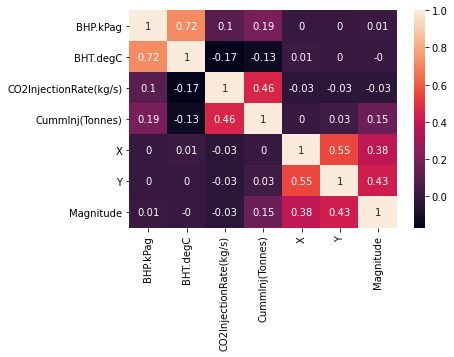

In [60]:
sns.heatmap(np.round(mg_df.corr(),2),annot=True)

In [62]:
c6_df = mg_df.loc[mg_df['Cluster'] == 'C-6']
c6_df

,DrillCentre,Well_Name,BHP.kPag,BHT.degC,CO2InjectionRate(kg/s),CummInj(Tonnes),X,Y,Magnitude,Cluster,ext_date,ext_time
57816,B,W3,20918.51953,98.169998,0.000000,6573.301532,7728.0,104155.0,-1.4,C-6,2017-09-25,16:00:00
57817,B,W4,21188.13237,96.950138,0.000000,13268.629600,7728.0,104155.0,-1.4,C-6,2017-09-25,16:00:00
57818,B,W5,20994.36133,98.220001,0.000000,5512.155322,7728.0,104155.0,-1.4,C-6,2017-09-25,16:00:00
57819,B,W6,21452.40225,82.605723,15.300154,32170.966300,7728.0,104155.0,-1.4,C-6,2017-09-25,16:00:00
57820,C,W7,22005.07952,78.513467,15.759678,39487.375630,7728.0,104155.0,-1.4,C-6,2017-09-25,16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
121621,C,W7,21849.30469,94.099998,0.000000,313305.672300,6680.0,104760.0,-0.9,C-6,2018-07-14,01:00:00
121622,C,W8,22235.68594,80.771699,15.326841,263427.235400,6680.0,104760.0,-0.9,C-6,2018-07-14,01:00:00
121623,C,W9,0.00000,0.000000,15.834683,306514.140900,6680.0,104760.0,-0.9,C-6,2018-07-14,01:00:00
121624,A,W1,22981.39490,84.203909,15.331589,354493.006700,6680.0,104760.0,-0.9,C-6,2018-07-14,01:00:00


<AxesSubplot:xlabel='Magnitude', ylabel='BHT.degC'>

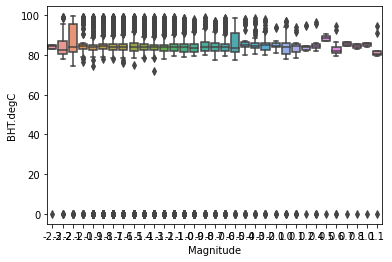

In [69]:
sns.boxplot(x=mg_df['Magnitude'],y=mg_df['BHT.degC'])

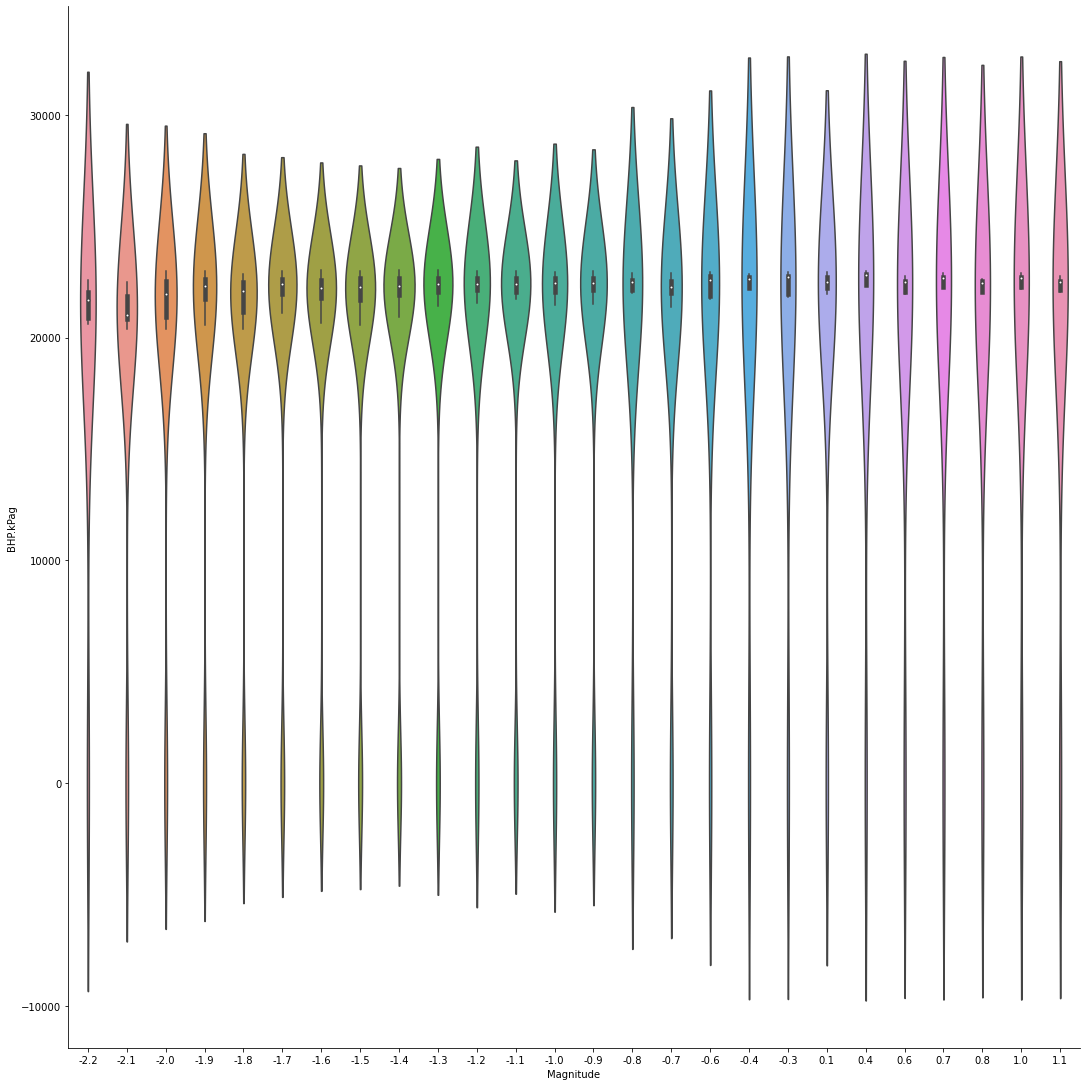

In [92]:
sns.catplot(
    data=c6_df,
    x='Magnitude',
    y='BHP.kPag',
    kind='violin',
    height=15, # make the plot 5 units high
    aspect=1)

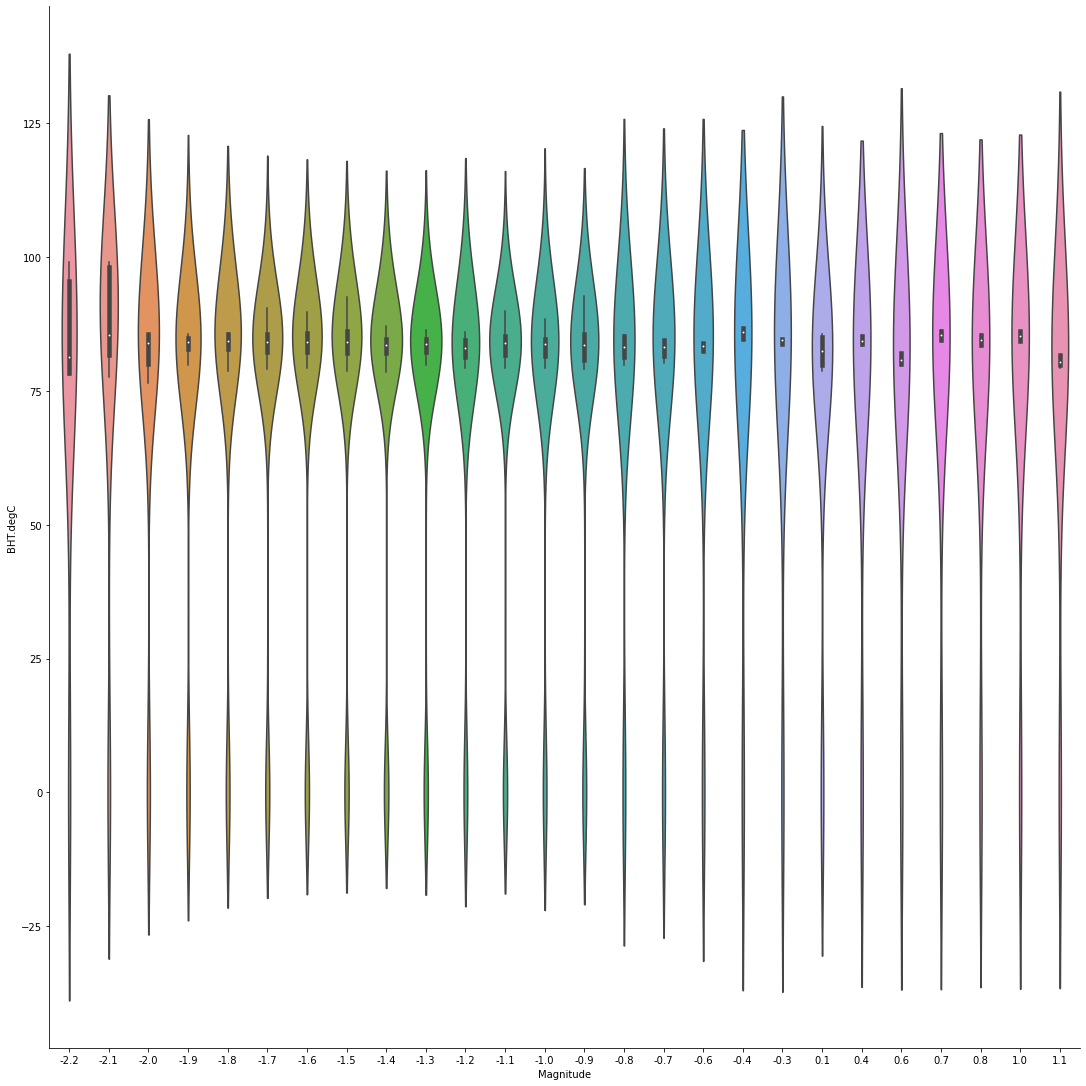

In [93]:
sns.catplot(
    data=c6_df,
    x='Magnitude',
    y='BHT.degC',
    kind='violin',
    height=15, # make the plot 5 units high
    aspect=1)

In [84]:
c1_df = mg_df.loc[mg_df['Cluster'] == 'C-1']
c1_df

,DrillCentre,Well_Name,BHP.kPag,BHT.degC,CO2InjectionRate(kg/s),CummInj(Tonnes),X,Y,Magnitude,Cluster,ext_date,ext_time
69786,B,W3,20925.41406,98.729996,0.000000,6573.301532,8651.0,104911.0,-1.8,C-1,2017-11-20,01:00:00
69787,B,W4,22123.32638,80.939276,19.389802,70653.312580,8651.0,104911.0,-1.8,C-1,2017-11-20,01:00:00
69788,B,W5,21063.30859,99.239825,0.000000,5512.155322,8651.0,104911.0,-1.8,C-1,2017-11-20,01:00:00
69789,B,W6,20581.12974,96.222337,0.000000,51516.828310,8651.0,104911.0,-1.8,C-1,2017-11-20,01:00:00
69790,C,W7,21957.25647,78.963280,14.102501,114666.569300,8651.0,104911.0,-1.8,C-1,2017-11-20,01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
120667,C,W7,21863.09375,93.706197,0.000000,313305.672300,8200.0,104760.0,-1.7,C-1,2018-09-07,17:00:00
120668,C,W8,22205.62569,81.138165,14.660896,257841.387500,8200.0,104760.0,-1.7,C-1,2018-09-07,17:00:00
120669,C,W9,0.00000,0.000000,15.131194,300741.030400,8200.0,104760.0,-1.7,C-1,2018-09-07,17:00:00
120670,A,W1,22949.71859,84.653159,14.657563,348907.445600,8200.0,104760.0,-1.7,C-1,2018-09-07,17:00:00


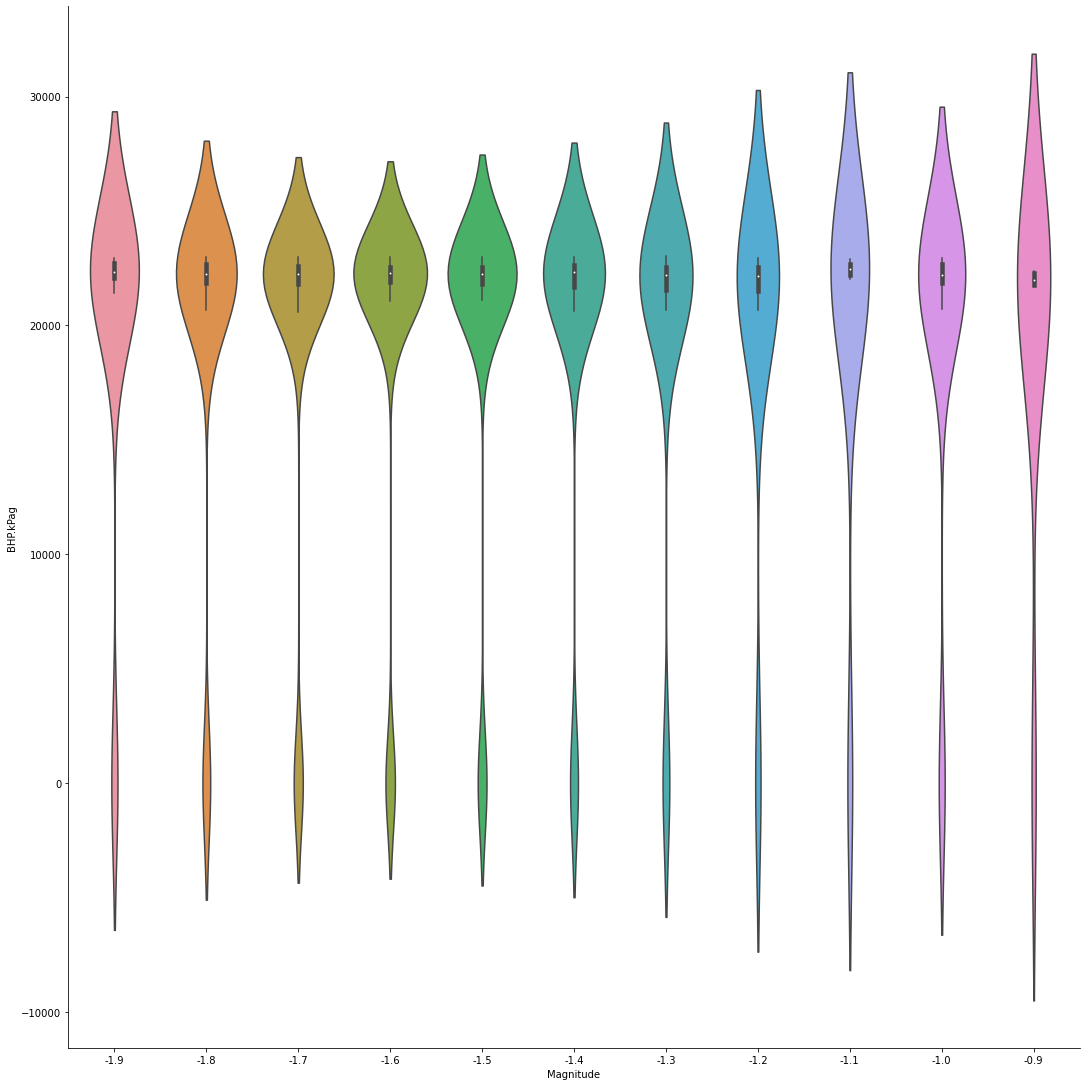

In [91]:
sns.catplot(
    data=c1_df,
    x='Magnitude',
    y='BHP.kPag',
    kind='violin',
    height=15, # make the plot 5 units high
    aspect=1)

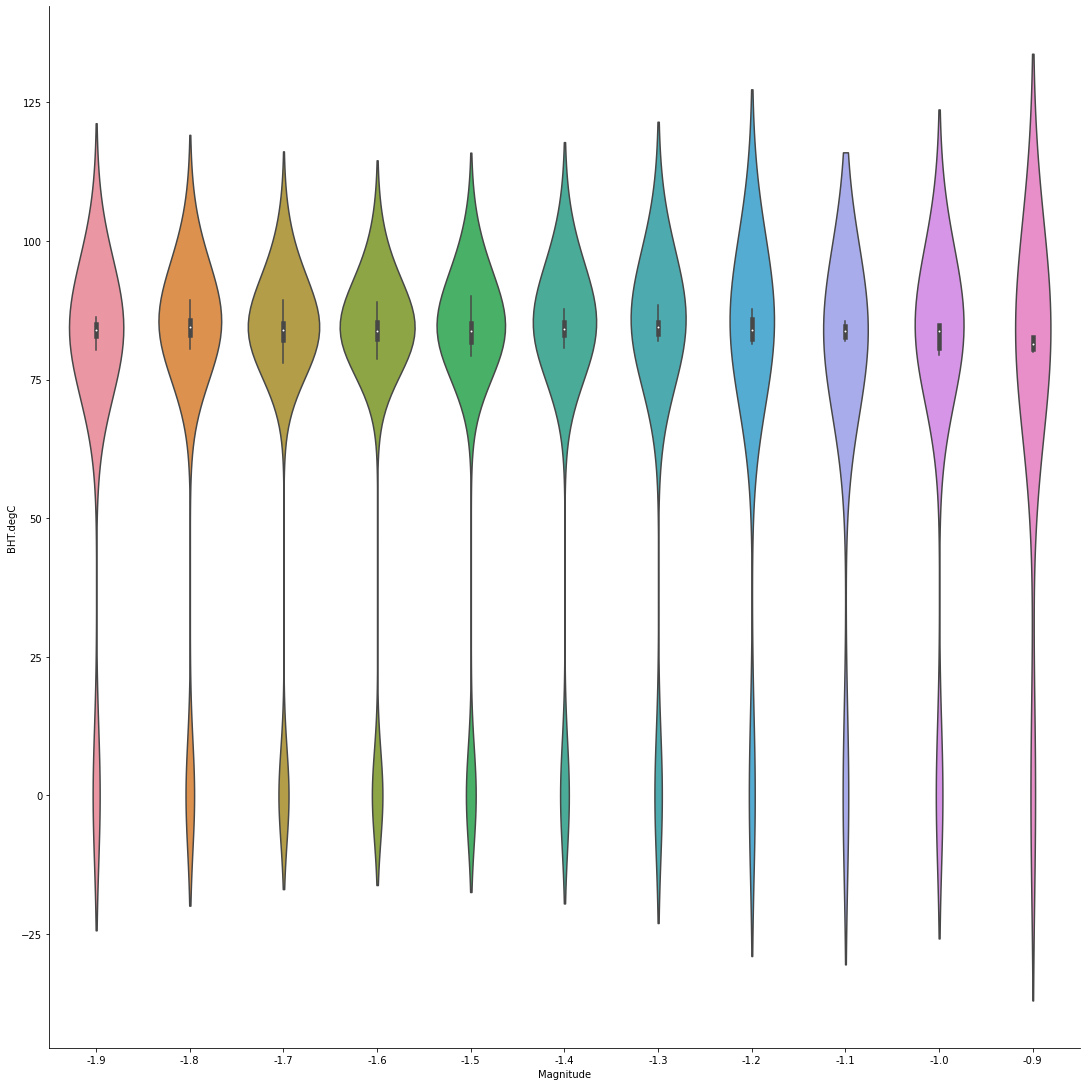

In [94]:
sns.catplot(
    data=c1_df,
    x='Magnitude',
    y='BHT.degC',
    kind='violin',
    height=15, # make the plot 5 units high
    aspect=1)

In [95]:
evt_df

,X,Y,Magnitude,Cluster,ext_date,ext_time
0,8009,104070,-2.1,C-5,2017-09-05,01:27:55
1,7728,104155,-1.4,C-6,2017-09-25,16:38:05
2,6712,104286,-1.6,C-6,2017-10-02,09:48:26
3,7649,104192,-2.1,C-6,2017-10-07,13:32:06
4,7683,104270,-2.1,C-6,2017-10-08,05:23:34
...,...,...,...,...,...,...
832,9244,103167,-1.2,C-3,2018-07-12,11:42:46
833,7782,105367,-1.2,C-7,2018-07-13,01:06:40
834,9760,103680,-0.9,C-12,2018-07-13,11:19:25
835,7400,104520,-1.4,C-6,2018-07-13,21:38:37


In [98]:
ndf = pd.read_csv('modified_injection_data.csv')

In [99]:
ndf

,Unnamed: 0,Time,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes),Cluster,Magnitude,EventTime
0,0,2017-09-04 21:00:00,B,W3,21798.21243,83.338941,15.991086,2891.609470,C-5,-2.1,2017-09-05 01:27:55
1,1,2017-09-04 21:00:00,B,W4,21487.69879,88.885637,4.703539,126.333858,C-5,-2.1,2017-09-05 01:27:55
2,2,2017-09-04 21:00:00,B,W5,19512.00195,99.459999,0.000000,0.000000,C-5,-2.1,2017-09-05 01:27:55
3,3,2017-09-04 21:00:00,B,W6,20964.90931,81.841647,6.287059,22669.475500,C-5,-2.1,2017-09-05 01:27:55
4,4,2017-09-04 21:00:00,C,W7,21392.32619,74.008464,10.006213,15518.929520,C-5,-2.1,2017-09-05 01:27:55
...,...,...,...,...,...,...,...,...,...,...,...
37660,37660,2018-07-14 01:00:00,C,W7,21849.30469,94.099998,0.000000,313305.672300,C-6,-0.9,2018-07-14 01:00:23
37661,37661,2018-07-14 01:00:00,C,W8,22235.68594,80.771699,15.326841,263427.235400,C-6,-0.9,2018-07-14 01:00:23
37662,37662,2018-07-14 01:00:00,C,W9,0.00000,0.000000,15.834683,306514.140900,C-6,-0.9,2018-07-14 01:00:23
37663,37663,2018-07-14 01:00:00,A,W1,22981.39490,84.203909,15.331589,354493.006700,C-6,-0.9,2018-07-14 01:00:23


In [ ]:
sns.catplot(
    data=ndf,
    x='Cumm Inj (Tonnes)',
    y='BHP.kPag',
    kind='box',
    height=15, # make the plot 5 units high
    aspect=1)

In [ ]:
smdf = ndf[:5000]